<a href="https://colab.research.google.com/github/victoriamaccari/actividad-guiada-1/blob/master/Copy_of_Copy_of_06MBIG_AG0_b_Base_Ejercicio_San_Juan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  El Problema

Vamos a utilizar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

El objetivo del ejercicio es por un lado jugar con una red neuronal para resolver un problema de regresión y por otro participar en una competición de datos. 


# Setting Preliminares

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas. 

In [60]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns




In [61]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab

In [62]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

En primer lugar subimos los datos de entrenamiento sin campo objetivo (dengue_features_train)


In [63]:
train = upload_files(['weekofyear', 'year'])
train.head()

Saving dengue_features_train (1).csv to dengue_features_train (1).csv
User uploaded file "dengue_features_train (1).csv" with length 287139 bytes


,,city,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,year,,,,,,,,,,,,,,,,,,,,,,
18,1990,sj,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
19,1990,sj,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
20,1990,sj,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
21,1990,sj,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
22,1990,sj,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [64]:
df_sj = train[train['city'] == 'sj']
print(df_sj)

                city week_start_date  ...  station_min_temp_c  station_precip_mm
weekofyear year                       ...                                       
18         1990   sj      1990-04-30  ...                20.0               16.0
19         1990   sj      1990-05-07  ...                22.2                8.6
20         1990   sj      1990-05-14  ...                22.8               41.4
21         1990   sj      1990-05-21  ...                23.3                4.0
22         1990   sj      1990-05-28  ...                23.9                5.8
...              ...             ...  ...                 ...                ...
13         2008   sj      2008-03-25  ...                21.1                1.8
14         2008   sj      2008-04-01  ...                22.2                0.5
15         2008   sj      2008-04-08  ...                21.7               30.7
16         2008   sj      2008-04-15  ...                21.7               11.2
17         2008   sj      20

In [65]:
train.shape

(1456, 22)

# Preproceso

Aquí irían todas las funciones y transformaciones que permitieran el uso de las variables en los siguientes clasificadores, por ejemplo la transformación de las variables categóricas en numéricas, etc.

In [66]:
df_sj.drop("week_start_date", axis = 1, inplace = True)
df_sj.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,year,,,,,,,,,,,,,,,,,,,,,
18,1990,sj,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
19,1990,sj,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
20,1990,sj,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
21,1990,sj,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
22,1990,sj,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [67]:
df_sj.shape

(936, 21)

In [68]:
df_sj.drop("city", axis = 1, inplace = True)
df_sj.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
weekofyear,year,,,,,,,,,,,,,,,,,,,,
18,1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
19,1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
20,1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
21,1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
22,1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


Trataremos los valores perdidos que los hay dado que nos evitarían tener un modelo de los datos que tenemos.

Los vamos a procesar de forma automática completandolos con el método ffill (con el valor previo)

In [69]:
pd.isnull(df_sj).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

In [70]:
df_sj.fillna(method='ffill', inplace=True)
pd.isnull(df_sj).any()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

Normalizamos los datos a partir de los coeficientes mínimo y máximo de la colección de entrenamiento

In [71]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
sj_norm = scaler.fit_transform(df_sj)
#sj_norm = scaler.fit_transform(df_sj.iloc[:,[1,20]].values) sin borrar city
sj_norm

array([[0.58783972, 0.62676332, 0.52370092, ..., 0.30337079, 0.28205128,
        0.05230467],
       [0.64041572, 0.66981079, 0.43529974, ..., 0.56179775, 0.56410256,
        0.02811376],
       [0.48741177, 0.70428426, 0.42268026, ..., 0.61797753, 0.64102564,
        0.13533835],
       ...,
       [0.27905297, 0.45157859, 0.37510328, ..., 0.30337079, 0.5       ,
        0.10035959],
       [0.45356528, 0.45157859, 0.53695564, ..., 0.30337079, 0.5       ,
        0.03661327],
       [0.41043739, 0.4990297 , 0.22719909, ..., 0.56179775, 0.70512821,
        0.00098071]])

# Reduccion de variables -PCA

In [72]:
#from sklearn import preprocessing 
#scaler = preprocessing.StandardScaler()
#states= scaler.fit_transform(df_sj)
#states= scaler.fit_transform(df_sj.iloc[:,[1,20]].values)


In [73]:
#2. PCA Estimation
from sklearn.decomposition import PCA
estimator = PCA (n_components = 4)
X_pca = estimator.fit_transform(sj_norm)
X_pca
X_pca.shape
print(X_pca)


[[ 0.83244856 -0.14457798  0.0297119   0.0232006 ]
 [ 0.30723834 -0.02340665  0.00930706 -0.08138872]
 [ 0.02336652  0.17144151  0.01987791 -0.13871343]
 ...
 [ 0.79084971  0.173378   -0.13703382  0.23695602]
 [ 0.79638133 -0.14722244  0.04292259  0.23351175]
 [ 0.18567118 -0.33180103 -0.42526902  0.02303542]]


In [74]:
#Con dos componentes se explica el 100% de la varianza, por lo que no se pierde informacion
print(estimator.explained_variance_ratio_) 
print(sum(estimator.explained_variance_ratio_))

[0.59005158 0.11874623 0.06515771 0.06346503]
0.8374205494627087


In [75]:
import numpy
from numpy import corrcoef, transpose, arange
#df_sj.reset_index(drop=True, inplace=True)



In [76]:
#pd.DataFrame(numpy.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2'], index=df_sj.columns)

ValueError: ignored

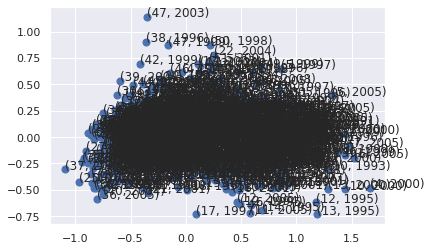

In [77]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1] ,s=50)

for i in range(0,len(X_pca)):
    ax.annotate(train.iloc[i,:].name[0:20], (X_pca[i,0], X_pca[i,1]))

# Analisis de correlacion

In [78]:
df_sj1=df_sj.iloc[:, 1:21]


In [79]:
df_feat = transpose(df_sj1)
df_feat

weekofyear,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
year,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1991,1991,1991,1991,1991,...,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
ndvi_nw,0.103725,0.142175,0.172967,0.245067,0.262200,0.174850,0.092800,0.072500,0.146175,0.121550,0.082350,0.211800,0.171700,0.247150,0.064333,0.128033,0.168800,0.330750,0.200025,0.437100,0.182433,0.260900,0.189750,0.067550,0.070200,0.089750,0.183433,0.181775,0.224600,0.330350,0.216525,0.088600,0.261660,0.266867,0.277233,0.140467,0.100467,0.293567,0.309333,0.246425,...,0.033500,0.100400,0.031050,0.006250,0.092700,0.063767,0.043300,0.056900,0.074900,-0.002940,0.024767,0.104000,0.132667,-0.009150,0.054300,-0.048600,-0.062550,-0.062550,-0.041667,-0.042350,-0.045550,-0.039000,0.016300,-0.309600,-0.108250,0.038300,-0.215300,-0.135400,-0.003200,-0.063100,-0.095067,0.015420,-0.090033,-0.141200,0.024450,-0.039900,-0.016833,-0.052750,-0.052750,-0.010367
ndvi_se,0.198483,0.162357,0.157200,0.227557,0.251200,0.254314,0.205071,0.151471,0.125571,0.160683,0.191943,0.301200,0.226900,0.379700,0.164443,0.206957,0.167657,0.264171,0.283817,0.123400,0.254829,0.199443,0.212486,0.179467,0.181617,0.128829,0.318000,0.178329,0.180386,0.131633,0.176786,0.266783,0.191386,0.260857,0.171267,0.151500,0.251900,0.259943,0.221029,0.243857,...,0.104557,0.233867,0.134314,0.127357,0.287329,0.151143,0.228333,0.238543,0.152571,0.152729,0.185300,0.118129,0.245943,0.191186,0.156814,0.205171,0.205743,0.204486,0.090917,0.095600,0.151440,0.173417,0.207267,0.239814,0.330486,0.125000,0.112614,0.223300,0.232843,0.150200,0.246057,0.211629,0.223243,0.110643,0.101629,0.310471,0.119371,0.137757,0.203900,0.077314
ndvi_sw,0.177617,0.155486,0.170843,0.235886,0.247340,0.181743,0.210271,0.133029,0.123600,0.202567,0.152929,0.280667,0.214557,0.381357,0.138857,0.168243,0.172286,0.284314,0.230443,0.148283,0.305686,0.244217,0.201186,0.157717,0.165750,0.123929,0.295900,0.186629,0.234886,0.125383,0.141586,0.251700,0.209986,0.302729,0.161622,0.167314,0.137617,0.217900,0.202757,0.195600,...,0.114857,0.243371,0.115857,0.125943,0.272486,0.131543,0.202186,0.187486,0.131929,0.144629,0.117729,0.126343,0.189757,0.176400,0.123529,0.172883,0.202543,0.156286,0.129086,0.089000,0.143171,0.150171,0.144578,0.195557,0.244286,0.108843,0.160214,0.170943,0.271171,0.149271,0.228129,0.117343,0.154186,0.141014,0.088000,0.296243,0.066386,0.141214,0.209843,0.090586
precipitation_amt_mm,12.420000,22.820000,34.540000,15.360000,7.520000,9.580000,3.480000,151.120000,19.320000,14.410000,22.270000,59.170000,16.480000,32.660000,28.800000,90.750000,32.400000,40.940000,28.860000,64.560000,143.730000,51.390000,31.180000,51.420000,143.550000,127.030000,101.350000,20.460000,20.000000,20.040000,33.610000,9.960000,0.000000,52.450000,0.000000,0.000000,15.850000,0.000000,0.000000,0.000000,...,85.110000,1.020000,37.750000,72.440000,34.470000,62.560000,30.770000,10.370000,70.390000,94.370000,74.500000,108.260000,17.560000,16.480000,137.550000,15.250000,42.000000,73.370000,15.950000,17.850000,31.300000,62.110000,0.000000,0.000000,37.240000,0.000000,81.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.190000,3.820000,16.960000,0.000000,0.000000
reanalysis_air_temp_k,297.572857,298.211429,298.781429,298.987143,299.518571,299.630000,299.207143,299.591429,299.578571,300.154286,299.512857,299.667143,299.558571,299.862857,300.391429,299.958571,300.332857,300.118571,300.530000,300.674286,299.857143,300.427143,300.775714,299.857143,299.195714,298.902857,299.727143,299.9

In [80]:
names =  df_feat.index

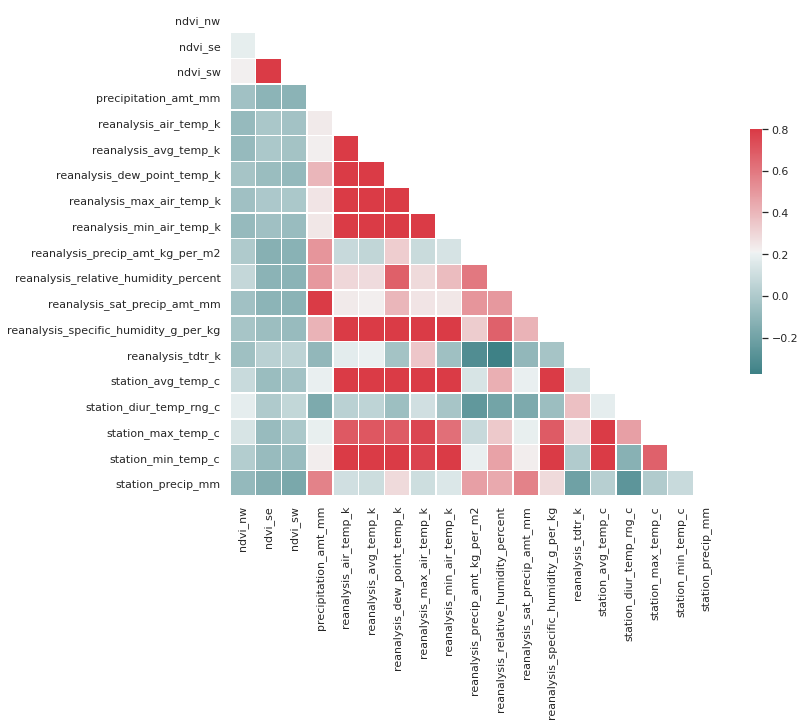

In [81]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_feat)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#Seleccion de caracteristicas
station_avg_temp_c porque me parece que la temperatura influye fuertemente y 
reanalysis_specific_humidity_g_per_kg porque estan correlacionadas.
reanalysis_tdtr_k, porque no esta correlacionada, y al ser diferente aporta mas info
ndvi_sw porque quiero tener en cuenta en el analisis la vegetacion

In [82]:
selected_features = ['reanalysis_specific_humidity_g_per_kg', 
                 'station_avg_temp_c', 'reanalysis_tdtr_k', 'ndvi_sw' ]

# Clustering jerarquico

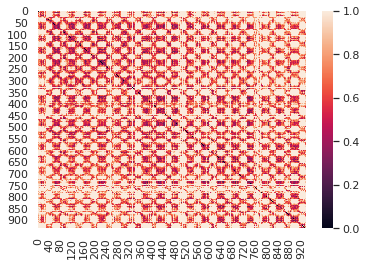

In [83]:
#3. Hierarchical Clustering
# 3.1. Compute the similarity matrix
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(sj_norm)

# 3.1.1 Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matsim,vmin=0, vmax=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


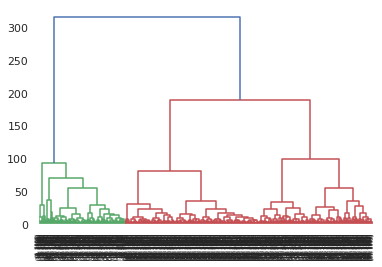

<Figure size 432x288 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [84]:
# 3.2. Building the Dendrogram	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'ward')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, labels = df_sj.index)

# 3.2.1 Visualization
f = plt.figure()
plt.figure(figsize=(15,10))
plt.show()
#f.savefig( "test.png")
#files.download('test.png')

In [87]:
#Realizo el corte en 30 porque me parece que quedaran una buena cantidad de grupos
cut = 90 
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 4, 5, 5, 5, 3, 5, 5, 3, 3, 5, 3, 5, 5, 3, 3, 3, 5, 3, 3, 5, 3,
       3, 3, 5, 5, 5, 3, 5, 5, 4, 4, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 5, 5, 4, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 5, 5, 4, 4, 5, 4, 2, 1, 1,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 5, 5,
       5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       5, 4, 5, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 2, 2, 4,
       4, 2, 5, 4, 4, 5, 5, 5, 3, 5, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 5, 5, 5, 3, 3, 3, 3, 3, 3, 5, 5,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 4, 4, 4,
       4, 5, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 1, 2, 4, 4, 2, 5, 5, 5,
       5, 5, 5, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 5, 5, 5, 5, 5, 4, 2, 2, 4, 2, 2, 1, 2,

In [88]:
#aplico el coeficiente de silhouette para conocer el numero estimado de clusters
from sklearn import metrics
n_clusters_ = len(set(labels)) 
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(sj_norm, labels))

Estimated number of clusters: 5
Silhouette Coefficient: 0.136


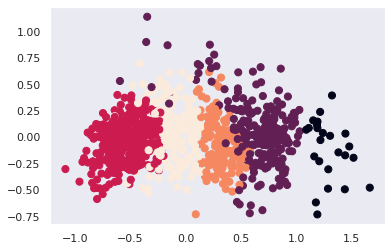

In [89]:
#Realizo grafico para visualizar los grupos utilizando el PCA
fig, ax = plt.subplots()
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)

plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


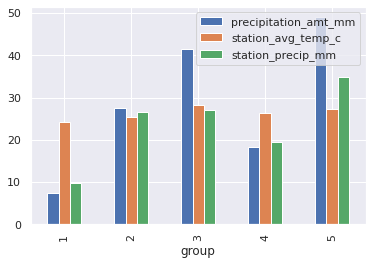

In [90]:
df_sj['group'] = labels

res = df_sj[['precipitation_amt_mm', 'station_avg_temp_c', 'station_precip_mm', 'group']].groupby(('group')).mean()
res.plot(kind='bar', legend=True)

# K-means

In [91]:
#configurar parametros
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [92]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

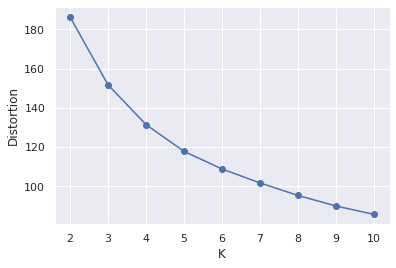

In [93]:
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()
#segun este grafico elegiria 5 grupos

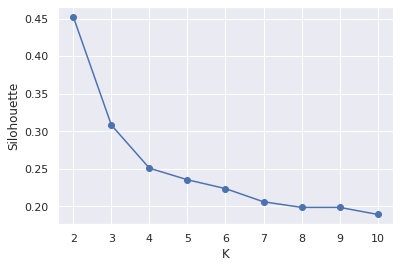

In [96]:
#segun este grafico elegiria 2 o 3 grupos, que es donde el coeficiente es mas alto
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

In [97]:
#ejecucion del algoritmo
k = 2

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

In [98]:
#Vamos a calcular los valores finales de las métricas del algoritmo
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(sj_norm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.381
Distortion: 186.42


In [99]:
#visualizo los resultados
km.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

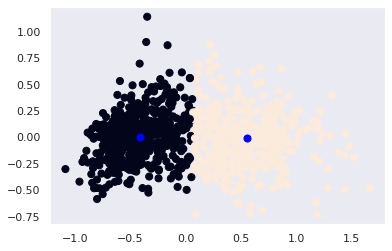

In [100]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='blue',s=50)
# 
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


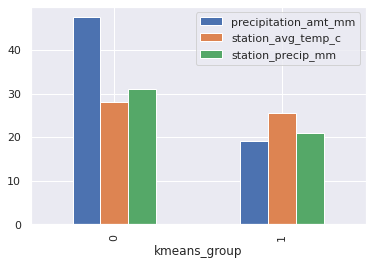

In [101]:
#interpretacion
df_sj['kmeans_group'] = km.labels_

res = df_sj[['precipitation_amt_mm', 'station_avg_temp_c', 'station_precip_mm', 'kmeans_group']].groupby(('kmeans_group')).mean()
res.plot(kind='bar', legend=True)

# Dbscan

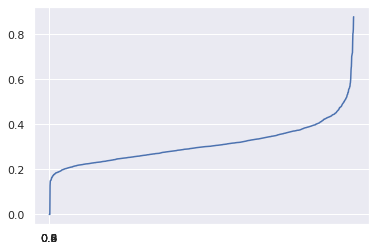

In [108]:
#parametrizacion
minPts=3
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(sj_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(sj_norm):
    for j in range(len(sj_norm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 1, 0.2))
ax.set_yticks(numpy.arange(0, 3, 0.2))

plt.plot(seq)


plt.show()

In [109]:
#ejecucion
from sklearn.cluster import DBSCAN

for eps in numpy.arange(0.2, 0.7, 0.1):
  db = DBSCAN(eps, min_samples=minPts).fit(sj_norm)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print (eps, n_clusters_)
  
#labels

0.2 9
0.30000000000000004 9
0.4000000000000001 1
0.5000000000000001 1
0.6000000000000001 1


In [110]:
db = DBSCAN(eps=0.4, min_samples=minPts).fit(sj_norm)
labels = db.labels_
labels

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

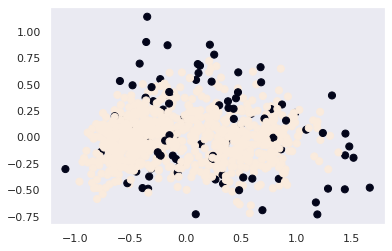

In [111]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()

In [112]:
#identifico outliers (-1)
df_sj['dbscan_group'] = labels

df_sj[df_sj['dbscan_group'] == -1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,group,kmeans_group,dbscan_group
weekofyear,year,,,,,,,,,,,,,,,,,,,,,,,
22,1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,5,0,-1
31,1990,0.150567,0.247150,0.379700,0.381357,32.66,299.862857,299.950000,296.172857,303.0,298.3,34.60,80.584286,32.66,17.594286,2.585714,28.242857,8.085714,34.4,22.8,37.6,5,0,-1
37,1990,0.127967,0.437100,0.123400,0.148283,64.56,300.674286,300.792857,297.192857,302.9,299.0,24.18,81.551429,64.56,18.777143,2.900000,28.685714,8.057143,33.9,24.4,25.9,3,0,-1
38,1990,0.196350,0.182433,0.254829,0.305686,143.73,299.857143,299.900000,296.431429,301.7,298.7,36.60,81.637143,143.73,17.892857,1.742857,28.242857,8.114286,32.8,23.9,3.3,5,0,-1
44,1990,0.252250,0.183433,0.318000,0.295900,101.35,299.727143,299.778571,296.534286,301.4,298.5,22.26,82.787143,101.35,18.034286,1.785714,27.971429,8.642857,33.3,22.8,6.3,5,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,2007,0.264300,0.051240,0.148443,0.144600,0.00,298.667143,298.892857,294.232857,300.2,297.6,12.40,76.528571,0.00,15.595714,1.871429,25.357143,4.985714,28.3,21.7,21.7,2,1,-1
17,2007,0.021600,0.020550,0.097443,0.064200,69.70,299.022857,299.250000,295.491429,302.8,296.9,63.10,81.112857,69.70,16.907143,3.357143,26.871429,7.428571,34.4,21.7,163.1,5,0,-1
44,2007,0.124300,0.054300,0.156814,0.123529,137.55,299.458571,299.542857,296.020000,302.1,297.7,174.64,81.594286,137.55,17.502857,2.600000,26.200000,5.400000,30.6,22.2,89.2,5,0,-1


# Expectation - Maximization

In [113]:
from sklearn.mixture import GaussianMixture

lowest_bic = numpy.infty
bic = []
best_cv = 'full'
best_k = 3
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components_range = range(1, 7)
for cv_type in cv_types:
    for k in range(1, 7):
        gmm = GaussianMixture(n_components=k, covariance_type=cv_type, init_params='random')
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_cv = cv_type
            best_k = k
            
print ("Mejor valor K", best_k, "Mejor tipo de Covarianza", best_cv)

Mejor valor K 3 Mejor tipo de Covarianza full


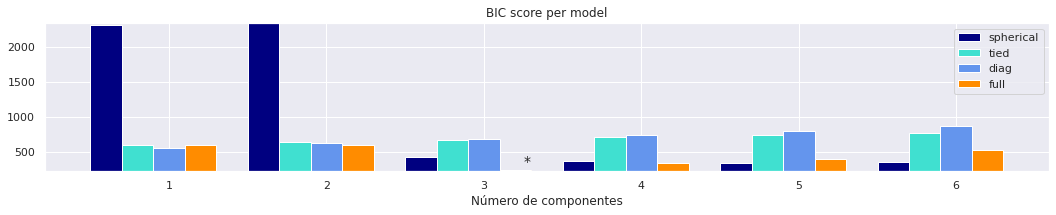

In [114]:
# Plot the BIC scores
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
bars = []
plt.figure(figsize=(18, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = numpy.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([min(bic) * 1.01 - .01 * max(bic), max(bic)])
plt.title('BIC score per model')
xpos = numpy.mod(numpy.argmin(bic), len(n_components_range)) + .65 +\
    .2 * numpy.floor(numpy.argmin(bic) / len(n_components_range))
plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)
spl.set_xlabel('Número de componentes')
spl.legend([b[0] for b in bars], cv_types)

In [115]:
EM = GaussianMixture(n_components=best_k, covariance_type=best_cv, init_params='random')
EM.fit(X_pca)
labels =  EM.predict(X_pca)
n_clusters = best_k - (1 if -1 in labels else 0)

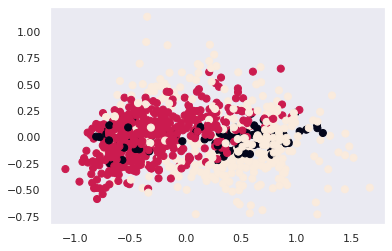

In [116]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()